In [1]:
!pip install yfinance
import yfinance as yf
ticker_symbol = 'TSLA'
ticker_data = yf.Ticker(ticker_symbol)
ticker_df = ticker_data.history(period='1d', start='2020-1-1', end='2023-12-31')
print(ticker_df.head())

                                Open       High        Low      Close  \
Date                                                                    
2020-01-02 00:00:00-05:00  28.299999  28.713333  28.114000  28.684000   
2020-01-03 00:00:00-05:00  29.366667  30.266666  29.128000  29.534000   
2020-01-06 00:00:00-05:00  29.364668  30.104000  29.333332  30.102667   
2020-01-07 00:00:00-05:00  30.760000  31.441999  30.224001  31.270666   
2020-01-08 00:00:00-05:00  31.580000  33.232666  31.215334  32.809334   

                              Volume  Dividends  Stock Splits  
Date                                                           
2020-01-02 00:00:00-05:00  142981500        0.0           0.0  
2020-01-03 00:00:00-05:00  266677500        0.0           0.0  
2020-01-06 00:00:00-05:00  151995000        0.0           0.0  
2020-01-07 00:00:00-05:00  268231500        0.0           0.0  
2020-01-08 00:00:00-05:00  467164500        0.0           0.0  


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Specify the URL of the webpage you want to scrape
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Send HTTP request to specified URL and save the response from server in a response object called r
r = requests.get(url)

# Create a BeautifulSoup object and specify the parser
soup = BeautifulSoup(r.text, 'html.parser')

# Scrape the data
tables = soup.find_all('table') # all table tags within the HTML
for index, table in enumerate(tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        table_index = index
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        date = col[0].text
        revenue = col[1].text.strip().replace("$", "").replace(",", "")
        tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

# Print the last five rows
print(tesla_revenue.tail())

          Date Revenue
51  2010-06-30      28
52  2010-03-31      21
53  2009-12-31        
54  2009-09-30      46
55  2009-06-30      27


In [3]:
import yfinance as yf

# Define the ticker symbol
ticker_symbol = 'GME'

# Get data on this ticker
ticker_data = yf.Ticker(ticker_symbol)

# Get the historical prices for this ticker
gme_data = ticker_data.history(period='1d', start='2020-1-1', end='2023-12-31')

# Reset the index
gme_data.reset_index(inplace=True)

# Show the first 5 rows of the dataframe
print(gme_data.head())

                       Date    Open    High     Low   Close    Volume  \
0 2020-01-02 00:00:00-05:00  1.5350  1.6175  1.5175  1.5775  17814400   
1 2020-01-03 00:00:00-05:00  1.5525  1.5625  1.4600  1.4700  14175600   
2 2020-01-06 00:00:00-05:00  1.4500  1.4775  1.4000  1.4625  13579200   
3 2020-01-07 00:00:00-05:00  1.4425  1.4575  1.3600  1.3800  20912000   
4 2020-01-08 00:00:00-05:00  1.3725  1.4625  1.3525  1.4300  22517600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Specify the URL of the webpage to scrape
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Send HTTP request to specified URL and save the response from the server in a response object called r
r = requests.get(url)

# Create a BeautifulSoup object and specify the parser
soup = BeautifulSoup(r.text, 'html.parser')

# Scrape the data
tables = soup.find_all('table') # find all table tags within the HTML
for index, table in enumerate(tables):
    if ("GameStop Quarterly Revenue" in str(table)):
        table_index = index
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        date = col[0].text
        revenue = col[1].text.strip().replace("$", "").replace(",", "")
        gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

# Print the last five rows
print(gme_revenue.tail())

          Date Revenue
53  2010-01-31    3524
54  2009-10-31    1835
55  2009-07-31    1739
56  2009-04-30    1981
57  2009-01-31    3492


In [6]:
import yfinance as yf

# Define the ticker symbol
ticker_symbol = 'TSLA'

# Get data on this ticker
ticker_data = yf.Ticker(ticker_symbol)

# Get the historical prices for this ticker
tesla_data = ticker_data.history(period='1d', start='2020-1-1', end='2023-12-31')

# Reset the index
tesla_data.reset_index(inplace=True)

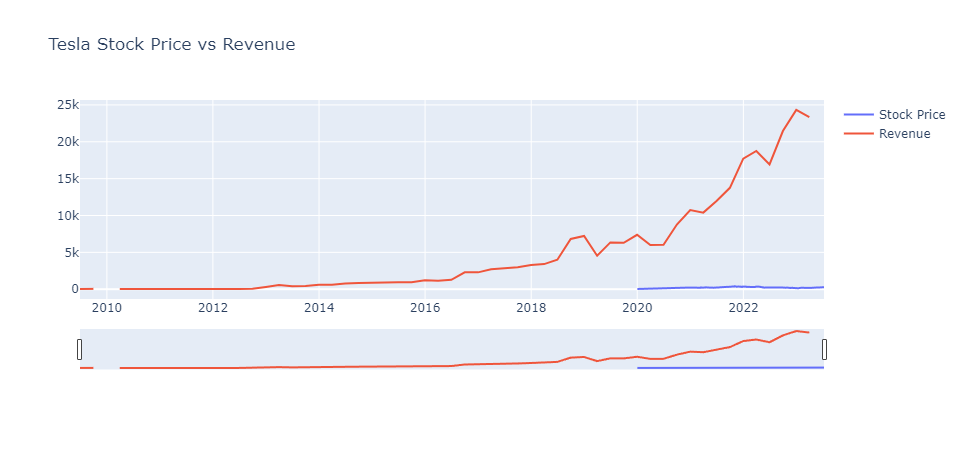

In [8]:
import plotly.graph_objs as go
def make_graph(stock_data, revenue_data, stock):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=stock_data.Date, y=stock_data.Close, mode='lines', name='Stock Price'))
    fig.add_trace(go.Scatter(x=revenue_data.Date, y=revenue_data.Revenue, mode='lines', name='Revenue'))
    fig.layout.update(title_text='Time Series data with Rangeslider', xaxis_rangeslider_visible=True)
    fig.update_layout(showlegend=True, title=f"{stock} Stock Price vs Revenue")
    fig.show()
make_graph(tesla_data, tesla_revenue, 'Tesla')
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

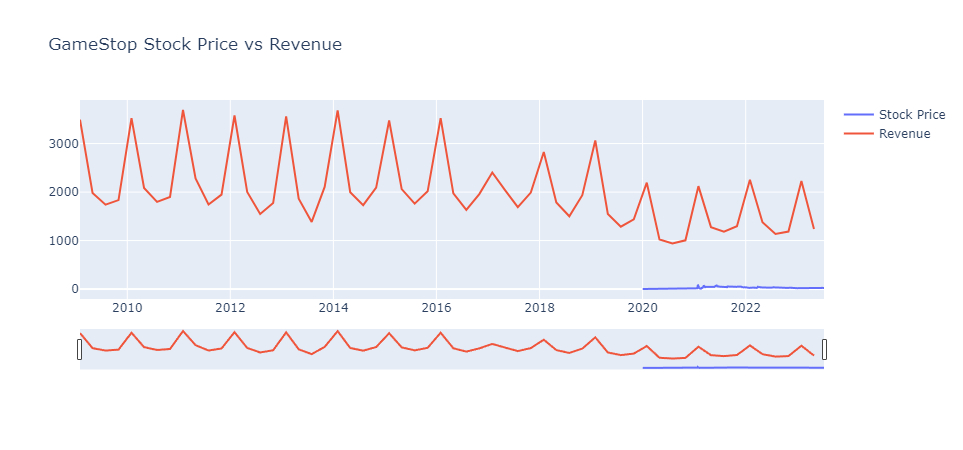

In [10]:
# Define the ticker symbol for GameStop
ticker_symbol = 'GME'

# Get data on this ticker
ticker_data = yf.Ticker(ticker_symbol)

# Get the historical prices for this ticker
gme_data = ticker_data.history(period='1d', start='2020-1-1', end='2023-12-31')

# Reset the index
gme_data.reset_index(inplace=True)

# Webscraping to extract GameStop's revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')
tables = soup.find_all('table')

for index, table in enumerate(tables):
    if ("GameStop Quarterly Revenue" in str(table)):
        table_index = index

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        date = col[0].text
        revenue = col[1].text.replace("$", "").replace(",", "")
        gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

# Convert 'Date' columns to datetime type and 'Revenue' to float
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])
gme_revenue['Revenue'] = gme_revenue['Revenue'].astype(float)

# Call the function with our data
make_graph(gme_data, gme_revenue, 'GameStop')